In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['science','notebook'])

from pymatgen.core import Structure
from pymatgen.analysis import structure_matcher

# Author: Elvis do A. Soares
# Github: @elvissoares
# Date: 2023-05-22

In [3]:
kB = 1.380649e-23 # J/K
Rconst = 0.082057366080960 # Gas constant
NA = 6.022e23 # Avogadro number

## Solid CIF file Information

In [4]:
structure_name = 'aCarbon-Bhatia-id001'
structure = Structure.from_file('../structures/'+structure_name+'.cif')
print('formula:  ', structure.formula)
print('num_sites:', structure.num_sites)

formula:   C1166
num_sites: 1166


In [5]:
coordinates = structure.cart_coords.T
Lsolid = np.array([l for l in structure.lattice.lengths])
print('Solid dimensions: ', Lsolid)
Vsolid = Lsolid[0]*Lsolid[1]*Lsolid[2]
print('Solid volume: ', Vsolid, ' A³')

Solid dimensions:  [29.5 29.8 30.2]
Solid volume:  26548.82  A³


In [6]:
print('x: ',structure.cart_coords[:,0].min(),structure.cart_coords[:,0].max())
print('y: ',structure.cart_coords[:,1].min(),structure.cart_coords[:,1].max())
print('z: ',structure.cart_coords[:,2].min(),structure.cart_coords[:,2].max())

x:  0.005015000000002582 29.47699
y:  0.024912800000000002 29.6384542
z:  0.04167600000000065 30.1975538


In [16]:
X,Y,Z,rho = np.load('dft-profiles-aCarbon-Bhatia-id001-CH4-TraPPE-DREIDING-T=298.0K-N=128-ljmethod=MMFA-P=100.0bar.npy')

In [69]:
rhob = rho[0,0,0]

In [79]:
lnrho = np.log10(rho/rhob+1e-30)

In [17]:
rho.shape

(218, 217, 216)

In [105]:
delta = Lsolid/np.array([128,128,128])
delta

array([0.23046875, 0.2328125 , 0.2359375 ])

In [29]:
Y.shape

(218, 217, 216)

In [21]:
Ngrid = 128
Npad = (np.array(rho.shape)-Ngrid)//2
Nhalf = np.array(rho.shape)//2

In [22]:
Npad

array([45, 44, 44])

In [23]:
Nhalf

array([109, 108, 108])

In [33]:
print(X[Npad[0]:-Npad[0],Npad[1]:-Npad[1],Nhalf[2]].shape,Y[Npad[0]:-Npad[0],Npad[1]:-Npad[1],Nhalf[2]].shape,rho[Npad[0]:-Npad[0],Npad[1]:-Npad[1],Nhalf[2]].shape)

(128, 129) (128, 129) (128, 129)


In [95]:
rhomax = 3
rhomin = -1

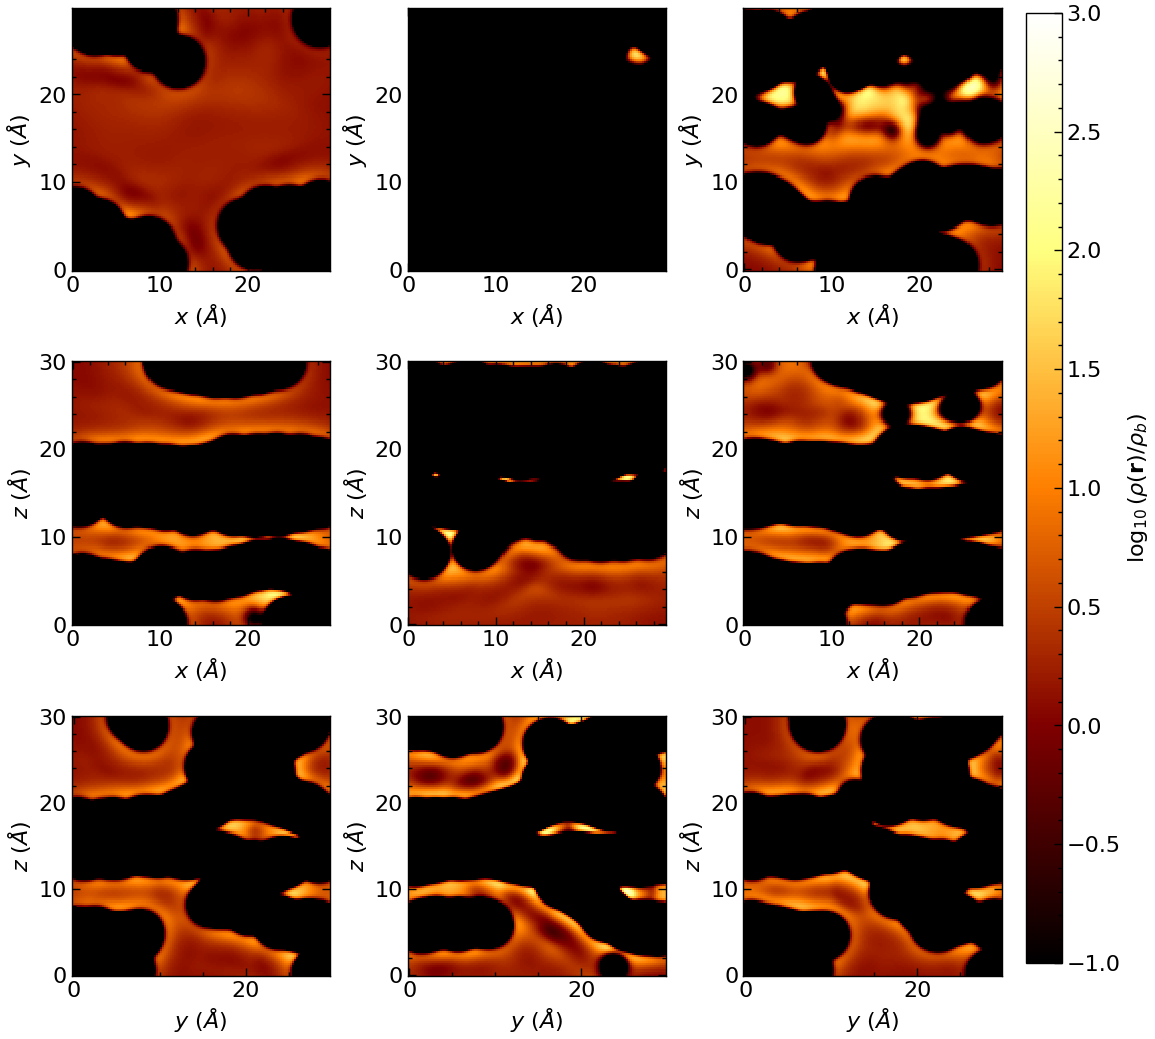

In [102]:
fig, axs = plt.subplots(nrows=3, ncols=3, subplot_kw=dict(aspect="equal"), figsize=(12, 10))
plt.subplots_adjust(hspace=0.2,wspace=0.3)

colormp = 'afmhot'

axs[0,0].pcolormesh(X[Npad[0]:-Npad[0],Npad[1]:-Npad[1],Npad[2]]+0.5*Lsolid[0],Y[Npad[0]:-Npad[0],Npad[1]:-Npad[1],Npad[2]]+0.5*Lsolid[1],lnrho[Npad[0]:-Npad[0],Npad[1]:-Npad[1],Npad[2]], cmap=colormp,vmin=rhomin,vmax=rhomax)
axs[0,0].set_xlabel(r'$x\ (\AA)$')
axs[0,0].set_ylabel(r'$y\ (\AA)$')
axs[0,1].pcolormesh(X[Npad[0]:-Npad[0],Npad[1]:-Npad[1],Nhalf[2]]+0.5*Lsolid[0],Y[Npad[0]:-Npad[0],Npad[1]:-Npad[1],Nhalf[2]]+0.5*Lsolid[1],lnrho[Npad[0]:-Npad[0],Npad[1]:-Npad[1],Nhalf[2]], cmap=colormp,vmin=rhomin,vmax=rhomax)
axs[0,1].set_xlabel(r'$x\ (\AA)$')
axs[0,1].set_ylabel(r'$y\ (\AA)$')
axs[0,2].pcolormesh(X[Npad[0]:-Npad[0],Npad[1]:-Npad[1],-Npad[2]-1]+0.5*Lsolid[0],Y[Npad[0]:-Npad[0],Npad[1]:-Npad[1],-Npad[2]-1]+0.5*Lsolid[1],lnrho[Npad[0]:-Npad[0],Npad[1]:-Npad[1],-Npad[2]-1], cmap=colormp,vmin=rhomin,vmax=rhomax)
axs[0,2].set_xlabel(r'$x\ (\AA)$')
axs[0,2].set_ylabel(r'$y\ (\AA)$')
axs[1,0].pcolormesh(X[Npad[0]:-Npad[0],Npad[1],Npad[2]:-Npad[2]]+0.5*Lsolid[0],Z[Npad[0]:-Npad[0],Npad[1],Npad[2]:-Npad[2]]+0.5*Lsolid[2],lnrho[Npad[0]:-Npad[0],Npad[1],Npad[2]:-Npad[2]], cmap=colormp,vmin=rhomin,vmax=rhomax)
axs[1,0].set_xlabel(r'$x\ (\AA)$')
axs[1,0].set_ylabel(r'$z\ (\AA)$')
axs[1,1].pcolormesh(X[Npad[0]:-Npad[0],Nhalf[1],Npad[2]:-Npad[2]]+0.5*Lsolid[0],Z[Npad[0]:-Npad[0],Nhalf[1],Npad[2]:-Npad[2]]+0.5*Lsolid[2],lnrho[Npad[0]:-Npad[0],Nhalf[1],Npad[2]:-Npad[2]], cmap=colormp,vmin=rhomin,vmax=rhomax)
axs[1,1].set_xlabel(r'$x\ (\AA)$')
axs[1,1].set_ylabel(r'$z\ (\AA)$')
axs[1,2].pcolormesh(X[Npad[0]:-Npad[0],-Npad[1]-1,Npad[2]:-Npad[2]]+0.5*Lsolid[0],Z[Npad[0]:-Npad[0],-Npad[1]-1,Npad[2]:-Npad[2]]+0.5*Lsolid[2],lnrho[Npad[0]:-Npad[0],-Npad[1]-1,Npad[2]:-Npad[2]], cmap=colormp,vmin=rhomin,vmax=rhomax)
axs[1,2].set_xlabel(r'$x\ (\AA)$')
axs[1,2].set_ylabel(r'$z\ (\AA)$')
axs[2,0].pcolormesh(Y[Npad[0],Npad[1]:-Npad[1],Npad[2]:-Npad[2]]+0.5*Lsolid[1],Z[Npad[0],Npad[1]:-Npad[1],Npad[2]:-Npad[2]]+0.5*Lsolid[2],lnrho[Npad[0],Npad[1]:-Npad[1],Npad[2]:-Npad[2]], cmap=colormp,vmin=rhomin,vmax=rhomax)
axs[2,0].set_xlabel(r'$y\ (\AA)$')
axs[2,0].set_ylabel(r'$z\ (\AA)$')
axs[2,1].pcolormesh(Y[Nhalf[0],Npad[1]:-Npad[1],Npad[2]:-Npad[2]]+0.5*Lsolid[1],Z[Nhalf[0],Npad[1]:-Npad[1],Npad[2]:-Npad[2]]+0.5*Lsolid[2],lnrho[Nhalf[0],Npad[1]:-Npad[1],Npad[2]:-Npad[2]], cmap=colormp,vmin=rhomin,vmax=rhomax)
axs[2,1].set_xlabel(r'$y\ (\AA)$')
axs[2,1].set_ylabel(r'$z\ (\AA)$')
im = axs[2,2].pcolormesh(Y[-Npad[0]-1,Npad[1]:-Npad[1],Npad[2]:-Npad[2]]+0.5*Lsolid[1],Z[-Npad[0]-1,Npad[1]:-Npad[1],Npad[2]:-Npad[2]]+0.5*Lsolid[2],lnrho[-Npad[0]-1,Npad[1]:-Npad[1],Npad[2]:-Npad[2]], cmap=colormp,vmin=rhomin,vmax=rhomax)
axs[2,2].set_xlabel(r'$y\ (\AA)$')
axs[2,2].set_ylabel(r'$z\ (\AA)$')

fig.subplots_adjust(bottom=0, right=0.9, top=1)
cax = plt.axes([0.92,0.03,0.03,0.95])
cb = fig.colorbar(im,cax=cax)
cb.ax.tick_params()
cb.set_label(r'$\log_{10}(\rho({\bf r})/\rho_b)$')
# fig.savefig('density-colormap-aCarbon-Bhatia-id001-CH4-TraPPE-DREIDING-T=298.0K-N=128-ljmethod=MMFA-P=100.0bar.pdf')
fig.savefig('density-colormap-aCarbon-Bhatia-id001-CH4-TraPPE-DREIDING-T=298.0K-N=128-ljmethod=MMFA-P=100.0bar.png',dpi=200)

Text(0, 0.5, '$\\bar{\\rho}\\ (molecules/\\AA^3)$')

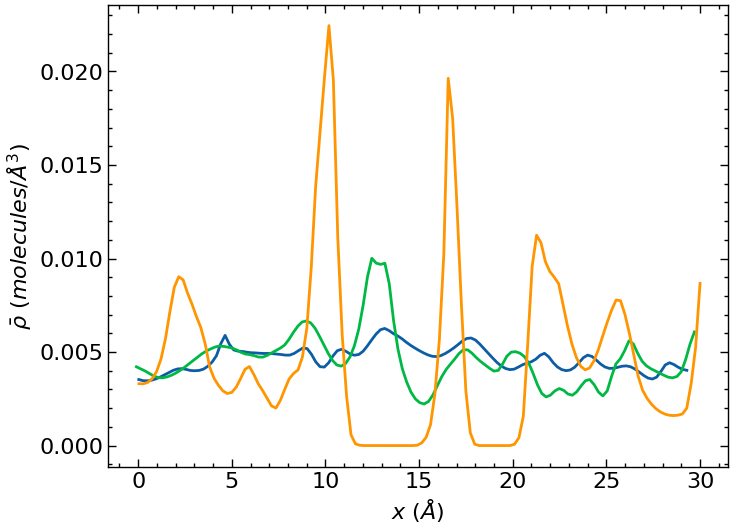

In [115]:
plt.plot(X[Npad[0]:-Npad[0],0,0]+0.5*Lsolid[0],np.sum(rho[Npad[0]:-Npad[0],Npad[1]:-Npad[1],Npad[2]:-Npad[2]],axis=(1,2))*delta[1]*delta[2]/(Lsolid[1]*Lsolid[2]))
plt.plot(Y[0,Npad[1]:-Npad[1],0]+0.5*Lsolid[1],np.sum(rho[Npad[0]:-Npad[0],Npad[1]:-Npad[1],Npad[2]:-Npad[2]],axis=(0,2))*delta[0]*delta[2]/(Lsolid[0]*Lsolid[2]))
plt.plot(Z[0,0,Npad[2]:-Npad[2]]+0.5*Lsolid[2],np.sum(rho[Npad[0]:-Npad[0],Npad[1]:-Npad[1],Npad[2]:-Npad[2]],axis=(0,1))*delta[0]*delta[1]/(Lsolid[0]*Lsolid[1]))
plt.xlabel(r'$x\ (\AA)$')
plt.ylabel(r'$\bar{\rho}\ (molecules/\AA^3)$')